In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import requests
from io import StringIO
import joblib

In [ ]:

# Fetch the dataset
url = "https://calmcode.io/static/data/titanic.csv"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)

In [ ]:
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Dataset loaded successfully!
Dataset shape: (714, 8)

First 5 rows of the dataset:


,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
survived,0
pclass,0
name,0
sex,0
age,0
fare,0
sibsp,0
parch,0


In [ ]:
# Data types
print("\nData Types:")
df.dtypes


Data Types:


,0
survived,int64
pclass,int64
name,object
sex,object
age,float64
fare,float64
sibsp,int64
parch,int64


In [ ]:
# Basic statistics
print("\nBasic statistics of the dataset:")
df.describe()


Basic statistics of the dataset:


,survived,pclass,age,fare,sibsp,parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514,0.512605,0.431373
std,0.491460,0.838250,14.526497,52.918930,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,15.741700,0.000000,0.000000
75%,1.000000,3.000000,38.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,5.000000,6.000000


In [ ]:
# Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis ---")

# Survival rate
print("\nOverall Survival Rate:")
survival_rate = df['survived'].mean() * 100
print(f"{survival_rate:.2f}%")

# Survival by gender
print("\nSurvival Rate by Gender:")
gender_survival = df.groupby('sex')['survived'].mean() * 100
print(gender_survival)

# Survival by passenger class
print("\nSurvival Rate by Passenger Class:")
class_survival = df.groupby('pclass')['survived'].mean() * 100
print(class_survival)

# Survival by age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print("\nSurvival Rate by Age Group:")
age_survival = df.groupby('age_group')['survived'].mean() * 100
print(age_survival)


--- Exploratory Data Analysis ---

Overall Survival Rate:
40.62%

Survival Rate by Gender:
sex
female    75.478927
male      20.529801
Name: survived, dtype: float64

Survival Rate by Passenger Class:
pclass
1    65.591398
2    47.976879
3    23.943662
Name: survived, dtype: float64

Survival Rate by Age Group:
age_group
Child          57.971014
Teen           42.857143
Young Adult    38.268156
Adult          40.000000
Senior         22.727273
Name: survived, dtype: float64


<ipython-input-12-45297bdba258>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('age_group')['survived'].mean() * 100



--- Creating Visualizations ---


<ipython-input-13-16721c81b79e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette=['red', 'green'])


Text(0, 0.5, 'Count')

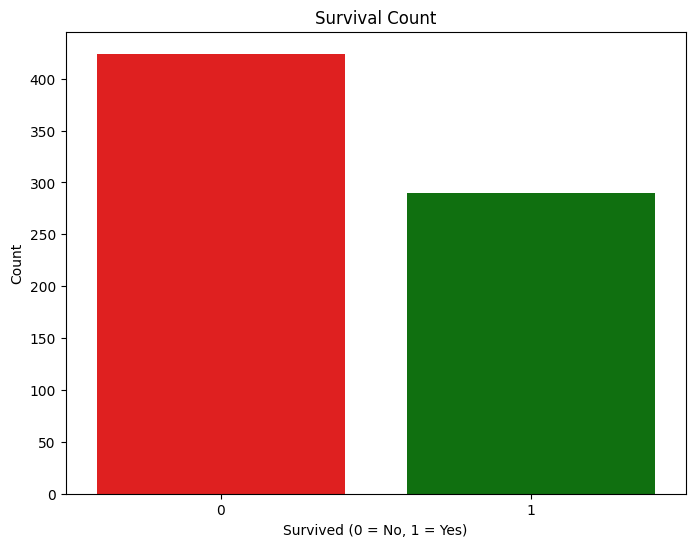

In [ ]:
 # Visualizations
print("\n--- Creating Visualizations ---")

# Survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df, palette=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')

<ipython-input-14-682c89da2d86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette=['blue', 'pink'])


Text(0, 0.5, 'Survival Rate')

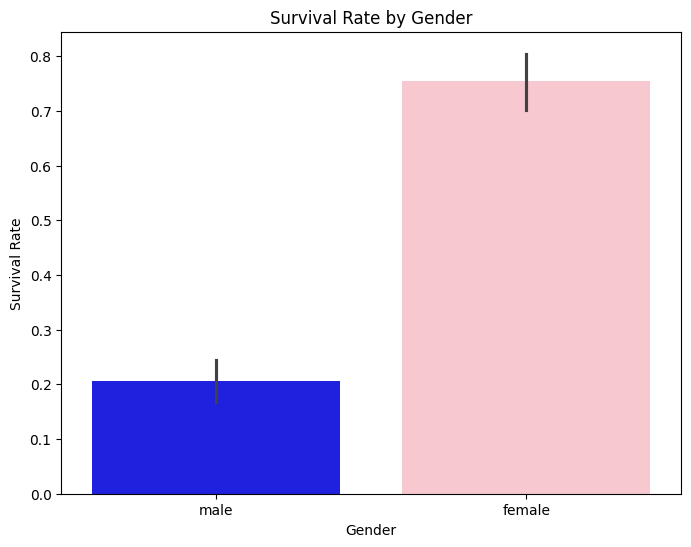

In [ ]:
# Survival by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, palette=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

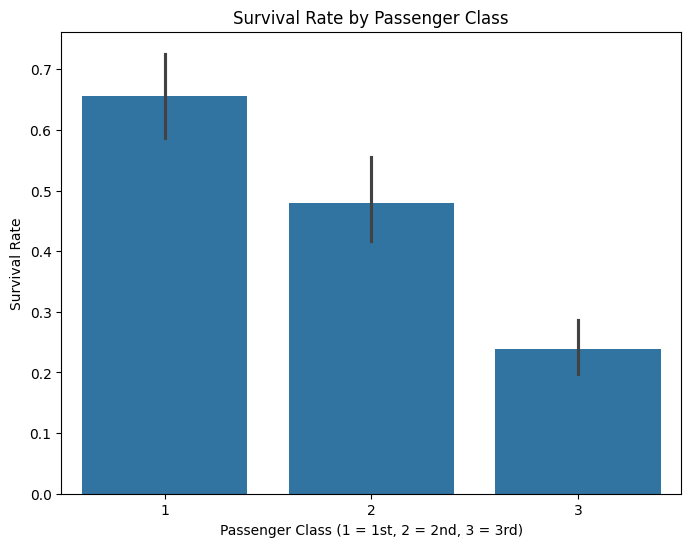

In [ ]:
# Survival by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

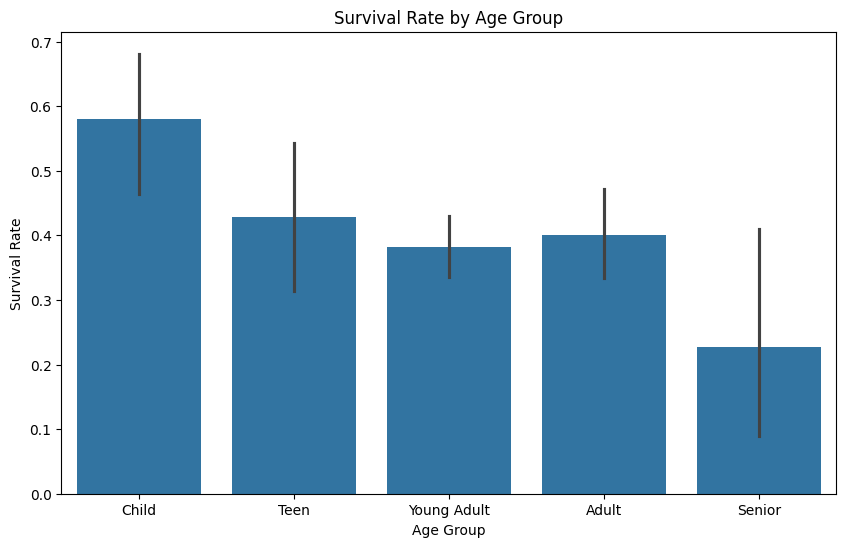

In [ ]:
# Survival by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Count')

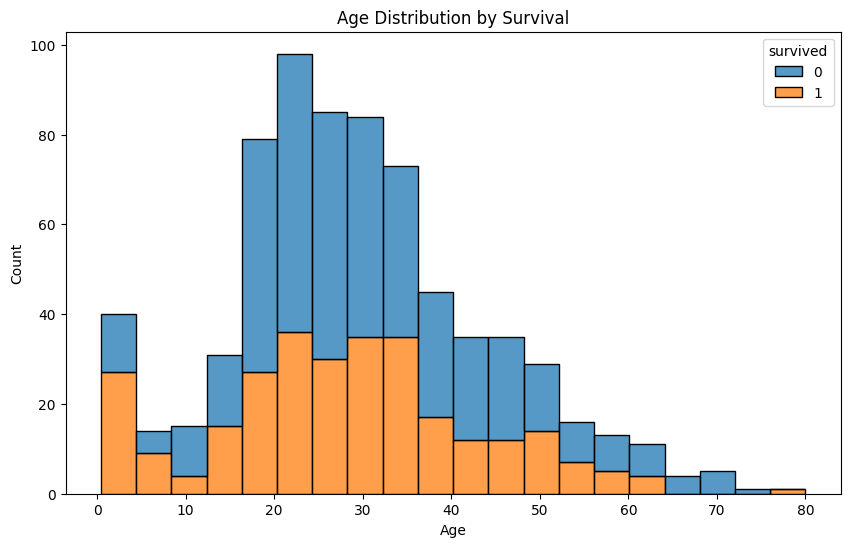

In [ ]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Fare')

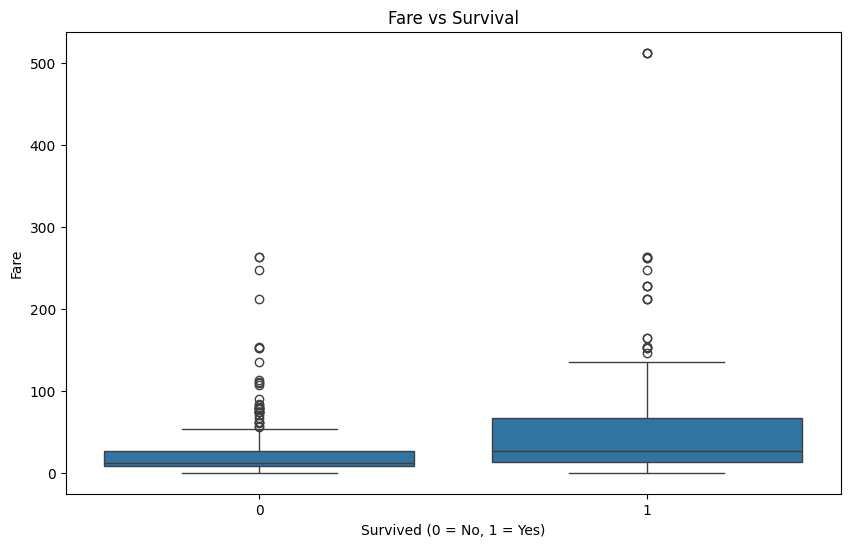

In [ ]:
# Fare vs Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')

In [ ]:
# Feature engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)

In [ ]:
# Extract titles from names
df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("\nUnique Titles:")
print(df['title'].value_counts())


Unique Titles:
title
Mr          398
Miss        146
Mrs         108
Master       36
Rev           6
Dr            6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [ ]:
# Group rare titles
rare_titles = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Countess', 'Dona']
df['title'] = df['title'].replace(rare_titles, 'Rare')
df['title'] = df['title'].replace(['Mlle', 'Ms'], 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')

In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['title_encoded'] = label_encoder.fit_transform(df['title'])
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch,age_group,family_size,is_alone,title,sex_encoded,title_encoded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0,Young Adult,2,0,Mr,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0,Adult,2,0,Mrs,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0,Young Adult,1,1,Miss,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0,Young Adult,2,0,Mrs,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0,Young Adult,1,1,Mr,1,2


In [ ]:
# Select features for the model
features = ['pclass', 'sex_encoded', 'age', 'fare', 'sibsp', 'parch', 'family_size', 'is_alone', 'title_encoded']
X = df[features]
y = df['survived']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm


Model Accuracy: 0.7972027972027972

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        87
           1       0.75      0.73      0.74        56

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143


Confusion Matrix:


array([[73, 14],
       [15, 41]])

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
         Feature  Importance
2            age    0.247356
3           fare    0.243592
1    sex_encoded    0.226570
8  title_encoded    0.095292
0         pclass    0.088342
6    family_size    0.042548
4          sibsp    0.027295
5          parch    0.021106
7       is_alone    0.007899


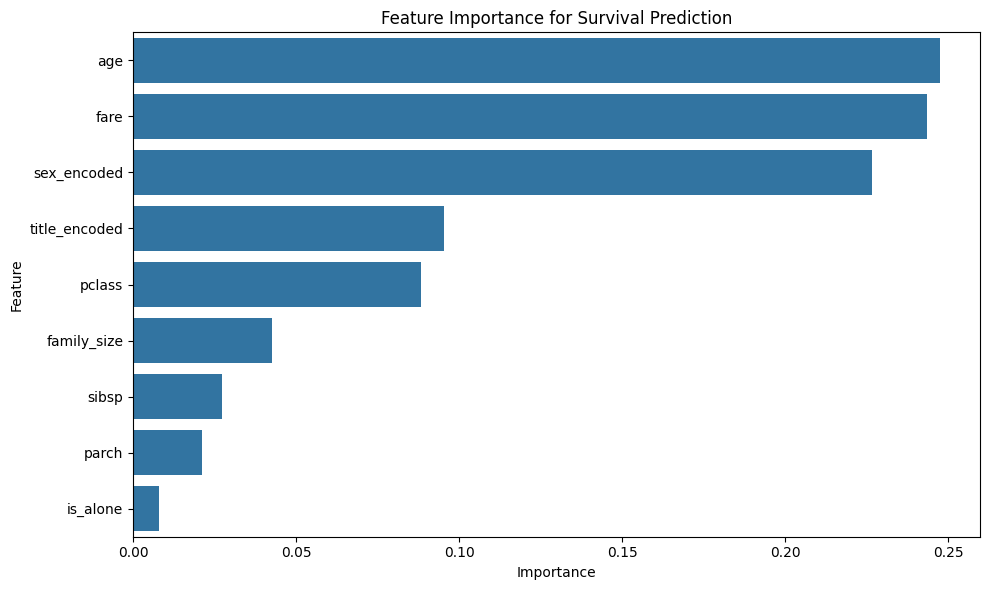

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Survival Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

In [ ]:
# Conclusion
print("\n--- Conclusion ---")
print("The most important factors for survival on the Titanic were:")
for i, row in feature_importance.head(3).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.4f}")

print("\nKey findings:")
print("1. Gender was a crucial factor - women had a much higher survival rate than men")
print("2. Passenger class (socio-economic status) significantly impacted survival chances")
print("3. Age played a role, with children having better survival rates")
print("4. Fare amount (related to wealth and class) correlated with survival")
print("5. Family size had an impact on survival probability")


--- Conclusion ---
The most important factors for survival on the Titanic were:
- age: 0.2474
- fare: 0.2436
- sex_encoded: 0.2266

Key findings:
1. Gender was a crucial factor - women had a much higher survival rate than men
2. Passenger class (socio-economic status) significantly impacted survival chances
3. Age played a role, with children having better survival rates
4. Fare amount (related to wealth and class) correlated with survival
5. Family size had an impact on survival probability


In [ ]:
# Save the trained model
joblib.dump(model, "titanic_model.pkl")

['titanic_model.pkl']

In [ ]:
# Example passenger data (Modify as needed)
sample_passenger = pd.DataFrame({
    "pclass": [3],
    "sex_encoded": [0],  # 1 for male, 0 for female
    "age": [25],
    "fare": [50.0],
    "sibsp": [0],
    "parch": [0],
    "family_size": [1],
    "is_alone": [1],
    "title_encoded": [1]  # Adjust based on title encoding
})

In [ ]:
# Load the trained model
loaded_model = joblib.load("titanic_model.pkl")

In [ ]:
# Predict survival
prediction = loaded_model.predict(sample_passenger)[0]
print(prediction)
# Display the result
if prediction == 1:
    print("The passenger **survived** 🟢")
else:
    print("The passenger **did NOT survive** 🔴")


0
The passenger **did NOT survive** 🔴


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
